# Investigation of Medical Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>A patient schedules a medical appointment, receives all the instructions and don't show up. The doctor loses a spot in his or her busy agenda and another patient who could have been attended earlier still gets to wait. Scale this situation up for thousands or millions. Sounds problematic, right?

>It this report, a database of approximately 110K appoitnments is analysed. It consists of 15 variables, which are described in the data dictionary below. The main goal of this analysis is to evaluate if it's possible to predict, based on several variables, <b>when someone will not show at their medical appointment</b> and what are the main drivers of this prediction (if any). In order to investigate the dataset, the following questions were answered:
><ul>
    <li>What's the percentage of no-show in this dataset?</li>
    <li>Does the patient's age or gender influence the no-show rate? What about segments of age and gender combined?</li>
    <li>Does higher timeframes between schedule and appointment dates influence the no-show rate? What about the hour of the appointment?</li>
    <li>Does sending SMS before the appointment decrease the no-show rate?</li>
    <li>Are patients with some kind of difficiency or disease more likely to don't show to appointments? Does age has any relation to it?</li>
    <li>Does scholarship influences the no-show rate?</li>
    <li>By taking a patient that has all the variables that influence the no-show rate, by how much its no-show rate exceeds the no-show mean?</li>
</ul>

>The database was originally posted in Kaggle and can be accessed through <a href="https://www.kaggle.com/joniarroba/noshowappointments">this link</a>. 

### Data Dictionary
> PatientId - Identification of a patient AppointmentID - Identification of each appointment Gender = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. DataMarcacaoConsulta = The day of the actuall appointment, when they have to visit the doctor. DataAgendamento = The day someone called or registered the appointment, this is before appointment of course. Age = How old is the patient. Neighbourhood = Where the appointment takes place. Scholarship = Ture of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia Hipertension = True or False Diabetes = True or False Alcoholism = True or False Handcap = True or False SMS_received = 1 or more messages sent to the patient. No-show = True or False.


In [28]:
#import used packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#get matplotlib graphics to show up inline
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for types, nulls and duplicates, and then trim and clean the columns of the dataset for analysis. Every step follows below along with justified decisions. In the code blocks, there are notes starting with a "#" describing what the code does.

### Database General Properties

In [29]:
#import used database
df = pd.read_csv('medical_appointments.csv')

In [30]:
#check column types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [31]:
#print first rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
#print last rows
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [64]:
#print statistics parameters for each variable
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.020276,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.140942,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
#column Age has a negative value as its minimum. Let's investigate it further.
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,0


In [32]:
#columns Scholarship, Hipertension, Diabetes, Alcoholism and Handcap seems to follow a bynary rule (True or False).
#Let's check their unique values to make sure:

for i in df.loc[:,'Scholarship':'Handcap'].columns:
    print ('Unique values for {} is {}.'.format(i,df.nunique()[i]))

Unique values for Scholarship is 2.
Unique values for Hipertension is 2.
Unique values for Diabetes is 2.
Unique values for Alcoholism is 2.
Unique values for Handcap is 5.


In [33]:
#Handcap has 5 unique values, which inconsistent with the data dictionary provided in Kagg
#This is why it is always important to check the data by yourself instead of taking the word of others.
#Let's check what those are:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [34]:
#Check for duplicated entries in the dataset:
sum(df.duplicated())

0

### Data Cleaning for Analysis

> Based on the analysis above, some aspects of the dataset are positive:
><ul>
    <li>There are no missing values in any column of the dataset, so no need to drop or replace null values;</li>
    <li>There are no duplicated entries, so no need to merge or drop duplicated values.</li>
</ul>

> However, there a few aspects that are worrisome and require cleaning:
><ul>
    <li>The "ScheduledDay" and "AppointmentDay" columns are formatted as string types. While that's is not a problem in itself, formatting both in datetime types might make the analysis a lot easier;</li>
    <li>The "Handcap" column was supposed to only contain 0 for non-handicapped individuals and 1 for handicapped ones. Since it has values up to 4 (we could indicate degrees or types of dificiencies), I will change any number above 1 to 1 in the dataset.</li>
    <li>The "No-show" column follows a different pattern. Converting "Yes" values into 1 and "No" values into 0 will make the analysis easier.</li>
    <li>The "Age" column has a negative value as its minimum that must be dropped.</li>
</ul>

In [35]:
#Format columns to datetime type:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [45]:
#Change all values above 1 in "Handcap" to 1:
df['Handcap'] = df['Handcap'].replace([2,3,4],1)

df['Handcap'].value_counts()

0    108286
1      2241
Name: Handcap, dtype: int64

In [54]:
#Change 'No' values to 0 and 'Yes' to 1 in the "No-show" column:
df['No-show'] = df['No-show'].replace(['Yes','No'],[1,0])

df['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

In [105]:
#Drop the row in which the patient's age is -1
df = df.query('Age >= 0')

df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

> Now that the dataset is trimmed and cleaned, let's move on to exploration. In this section, I will ask potential questions about the variables of the dataset, compute statistics and create visualizations with the goal of addressing our main research question: is it possible to predict patient no-show? If it is, which variables are the main drivers of patients deciding to show or not? 

### What's the percentage of no-show in this dataset?

0    0.798067
1    0.201933
Name: No-show, dtype: float64


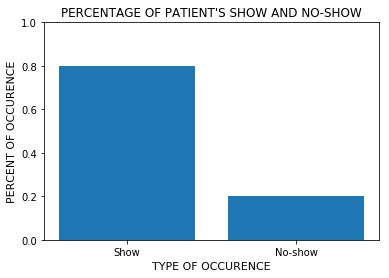

In [98]:
proportions = df['No-show'].value_counts()/df['No-show'].count()
print(proportions)
locations = [0,1]
labels = ['Show','No-show']
plt.bar(locations,proportions, tick_label=labels)
plt.ylim(0,1)
plt.title("PERCENTAGE OF PATIENT'S SHOW AND NO-SHOW")
plt.ylabel('PERCENT OF OCCURRENCE',fontsize=11)
plt.xlabel('TYPE OF OCCURENCE',fontsize=11);


#proportions.plot(kind='bar',title="PERCENTAGE OF PATIENT'S SHOW AND NO-SHOW", alpha=0.7);

About 20% of patients don't attend their appointments. Now that we have a mean, we can evaluate which variables influence no-show the most based on how much above or below the mean they are.

### Does the patient's age or gender influence the no-show rate? What about segments of age and gender combined?

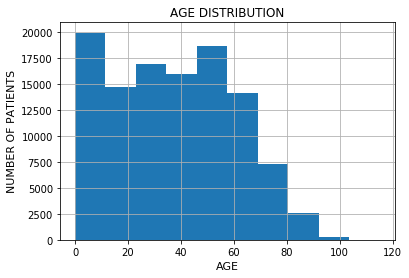

In [109]:
#Check how the patients are distributed in their ages:
df['Age'].hist();
plt.title('AGE DISTRIBUTION')
plt.ylabel('NUMBER OF PATIENTS',fontsize=11)
plt.xlabel('AGE',fontsize=11);

There're a lot of patients below 18 (specially below 10), in which the patients' parents are responsible for taking them to the appointment. Let's divide the age in subgroups so we can better work them around. For the division, we will use the quartiles and mean of the age column.


In [119]:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [141]:
#Create divisions using the min, 25% quantile, 50% quantile, 75% quantile and max.
age_divisions = [df['Age'].min(),df['Age'].quantile(q=0.25),df['Age'].mean(),df['Age'].quantile(q=0.75),df['Age'].max()]
age_names = ['minors','young adults','middle-aged','older adults']

df['Age_segments'] = pd.cut(df['Age'], age_divisions, labels=age_names)

/Users/Gavrik/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


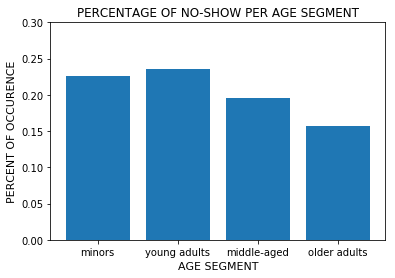

In [175]:
plt.bar(age_names,df.groupby(['Age_segments']).mean()['No-show'])
plt.ylim(0,0.3)
plt.title("PERCENTAGE OF NO-SHOW PER AGE SEGMENT")
plt.ylabel('PERCENT OF OCCURRENCE',fontsize=11)
plt.xlabel('AGE SEGMENT',fontsize=11);

There's a higher no-show rate in the minors and young adults clusters. Let's investigate gender now.

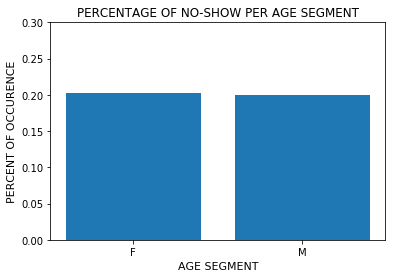

In [198]:
plt.bar(df['Gender'].unique(), df.groupby(['Gender']).mean()['No-show'])
plt.ylim(0,0.3)
plt.title("PERCENTAGE OF NO-SHOW PER AGE SEGMENT")
plt.ylabel('PERCENT OF OCCURRENCE',fontsize=11)
plt.xlabel('AGE SEGMENT',fontsize=11);

Quite similar, with a slighly lower rate in Male patients. Let's combine the age segments with gender now.

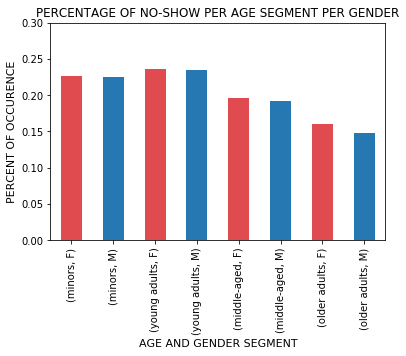

In [192]:
age_gender = df.groupby(['Age_segments','Gender']).mean()['No-show']
colors = ['#e04b50','#2678b2']
age_gender.plot(kind='bar', color = 4*colors)
plt.ylim(0,0.3)
plt.title("PERCENTAGE OF NO-SHOW PER AGE SEGMENT PER GENDER")
plt.ylabel('PERCENT OF OCCURRENCE',fontsize=11)
plt.xlabel('AGE AND GENDER SEGMENT',fontsize=11);

In conclusion, there's a considerably higher rate of no-show in minors and young adults, with no difference between male and female patients. They are about 2-3% above the no-show mean rate. Regarding middle-aged and older aduls, while middle-aged are located right in the no-show mean rate, older adults are below. Also, there seems to be a higher no-show rate in female patients for middle-aged and older adults.

### Does higher timeframes between schedule and appointment dates influence the no-show rate? What about the hour of the appointment?

Let's first create a new column, "Diff", which will contain the difference in days between the schedule date and the appointment date. Then, create 2 segments using the difference mean as a division point.

In [201]:
df['Diff'] = (df['AppointmentDay'] - df['ScheduledDay']).astype('timedelta64[D]')
df['Diff'].describe()

/Users/Gavrik/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: Diff, dtype: float64

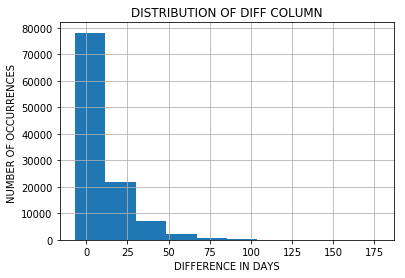

In [209]:
df['Diff'].hist();
plt.title('DISTRIBUTION OF DIFF COLUMN')
plt.xlabel('DIFFERENCE IN DAYS')
plt.ylabel('NUMBER OF OCCURRENCES ');

Apparently, there're several imputs of appointment dates before the schedule dates. Let's clean the negative values in the "Diff" columns, as well as the outliers. Then, let's divide it into 2 groups and check their no-show rates.

Text(0,0.5,'PERCENT OF OCCURRENCE')

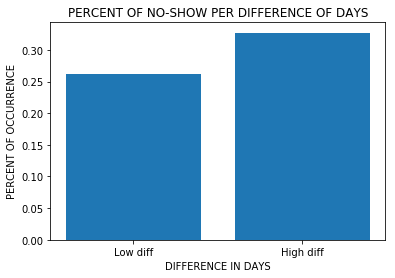

In [222]:
df_diff = df.query('Diff >= 0 and Diff <= 150')

diff_mean = df_diff['Diff'].mean()

low_diff = df_diff.query('Diff < {}'.format(diff_mean))['No-show']
high_diff = df_diff.query('Diff >= {}'.format(diff_mean))['No-show']

plt.bar(['Low diff','High diff'],[low_diff.mean(),high_diff.mean()]);
plt.title('NO-SHOW RATE PER DIFFERENCE OF DAYS')
plt.xlabel('DIFFERENCE IN DAYS')
plt.ylabel('PERCENT OF OCCURRENCE')

Doctors are more likely to experience a no-show from patients in appointments scheduled way ahead the schedule date.

### Does sending SMS before the appointment decrease the no-show rate?

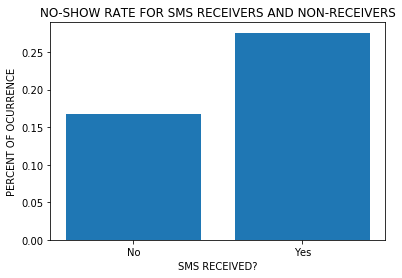

In [230]:
plt.bar(['No','Yes'],df.groupby(['SMS_received']).mean()['No-show']);
plt.title('NO-SHOW RATE FOR SMS RECEIVERS AND NON-RECEIVERS')
plt.xlabel('SMS RECEIVED?')
plt.ylabel('PERCENT OF OCURRENCE');

Surprisingly, sending a SMS before the appointment was not an effective method to decrease patient no-show. By the contrary.

### Are patients with some kind of difficiency or disease more likely to don't show to appointments? Does age has any relation to it?

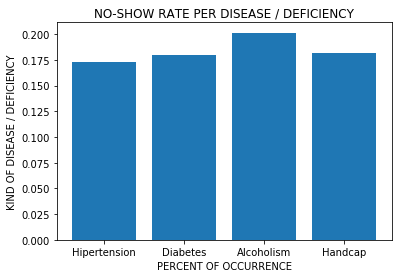

In [302]:
hiper_mean = df.query('Hipertension == 1').mean()['No-show']
diab_mean = df.query('Diabetes == 1').mean()['No-show']
alc_mean = df.query('Alcoholism == 1').mean()['No-show']
hand_mean = df.query('Handcap == 1').mean()['No-show']

group = [hiper_mean,diab_mean,alc_mean,hand_mean]

plt.bar(df.loc[:,'Hipertension':'Handcap'].columns,group);
plt.title('NO-SHOW RATE PER DISEASE / DEFICIENCY')
plt.xlabel('PERCENT OF OCCURRENCE')
plt.ylabel('KIND OF DISEASE / DEFICIENCY');

In [231]:
for i, v in enumerate(df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show
14 Age_segments
15 Diff


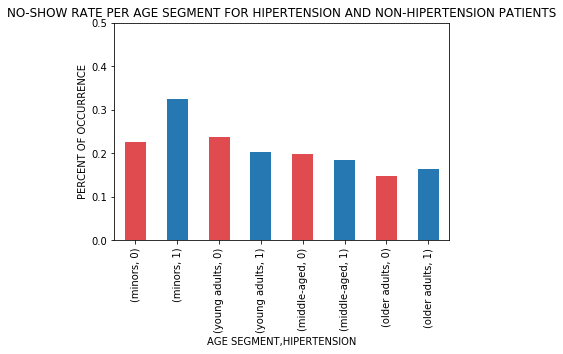

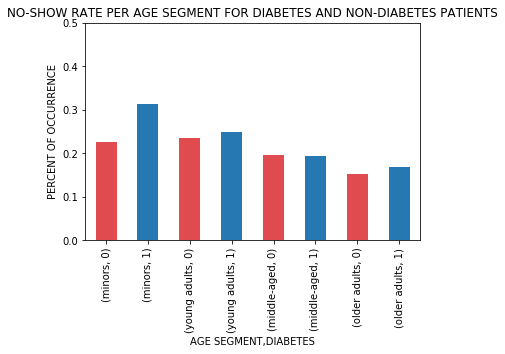

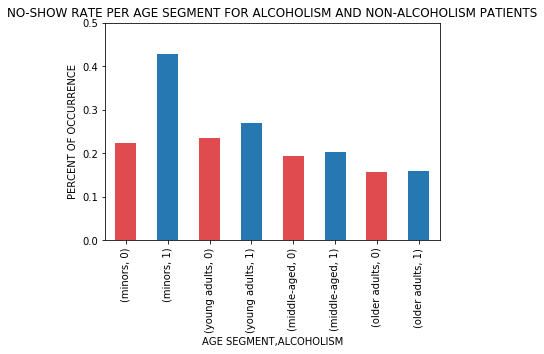

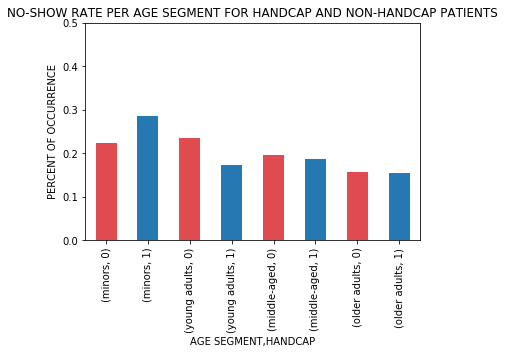

In [315]:
for i in df.iloc[:,8:12].columns:
    fig, axes = plt.subplots()
    df.groupby(['Age_segments',i]).mean()['No-show'].plot(kind='bar', color=4*colors)
    plt.ylim(0,0.5)
    plt.title('NO-SHOW RATE PER AGE SEGMENT FOR {} AND NON-{} PATIENTS'.format(i.upper(),i.upper()))
    plt.ylabel('PERCENT OF OCCURRENCE')
    plt.xlabel('AGE SEGMENT,{}'.format(i.upper()))

Alcoholism is the variable that influences the most in no-show rate. When evaluating if the diseases / deficiencies would have a different influence based on the age segment, minors with any kind of disease or dificiency has a much higher no-show rate than minors without it.

### Does scholarship influences the no-show rate?

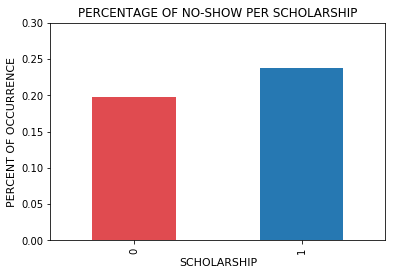

In [313]:
df.groupby('Scholarship').mean()['No-show'].plot(kind='bar',color=colors);
plt.ylim(0,0.3)
plt.title("PERCENTAGE OF NO-SHOW PER SCHOLARSHIP")
plt.ylabel('PERCENT OF OCCURRENCE',fontsize=11)
plt.xlabel('SCHOLARSHIP',fontsize=11);

Scholarship doesn't have an influence in the no-show rate. 

### By taking a patient that has all the variables that influence the no-show rate, by how much its no-show rate exceeds the no-show mean?

/Users/Gavrik/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


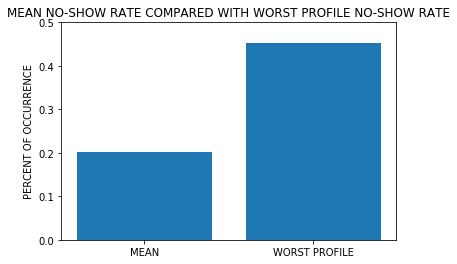

In [314]:
df['Sum_conditions'] = df['Hipertension'] + df['Diabetes'] + df['Alcoholism'] + df['Handcap']
df.head()
profile = df.query("Age_segments == 'minors' and Diff >= {} and Sum_conditions > 0".format(diff_mean,df.iloc[:,8:11]))

plt.bar(['MEAN','WORST PROFILE'],[df['No-show'].mean(),profile['No-show'].mean()]);
plt.ylim(0,0.5)
plt.title('MEAN NO-SHOW RATE COMPARED WITH WORST PROFILE NO-SHOW RATE')
plt.ylabel('PERCENT OF OCCURRENCE');

The worst profile here is a patient in the "Minors" age group (less than 18 years old) with a difference between the schedule date and the appointment date of more than 7 days and with at least one condition (considering hipertension, diabetes, alcoholism and handcap). 

The worst profile more than doubles the no-show rate, reaching around 45% compared to the dataset mean of 20%.

<a id='conclusions'></a>
## Conclusions

>Before jumping into the conclusions based in the analysis above, a few disclaimers:
><ul>
    <li>Analysis is limited since there's no information about the patient's family income or whether the patient has any kind of medical insurance.</li>
    <li>Although the neighbourhood was provided, there's no information regarding the distance of the neightbourhood to a hospital or clinic. Hence, the variable wasn't used in the analysis.</li>
</ul>


>Based on the analysis, the variables that influence the no-show rate the most are:
><ul>
    <li>Patients with special conditions (such as some kind of disease or defficiency), specially alcoholism.</li>
    <li>Patients below 18 (minors).</li>
    <li>Patients to scheduled their appointment 7 days or more ahead.</li>
</ul>

Although it's hard to confirm the variables above can predict whether a patient will show up or not, they highly increase the no-show rate, reaching almost 50%.